# Instant Data-intensive Apps with pandas How-to

For this example we'll use Anaconda Python and we'll create an environment including all the required packages:

``` bash
conda create --name instant_pandas numpy scikit-learn pandas pandas-datareader statsmodels flask matplotlib jupyter openpyxl
```

Once all the packages are installed, enable it with

``` bash
source activate instant_pandas
```

## Working with files (Simple)
Start by creating a simple DataFrame:

In [1]:
import numpy as np
import pandas as pd

my_df = pd.DataFrame([1,2,3])
my_df

,0
0,1
1,2
2,3


Now add some column headers and an index:

In [2]:
seedval = 123456
np.random.seed(seedval)

cols = ['A', 'B']
idx = pd.Index(list('name'), name='a')
data = np.random.normal(10, 1, (4,2))
df = pd.DataFrame(data, columns=cols, index=idx)
df

,A,B
a,,
n,10.469112,9.717137
a,8.490941,8.864368
m,11.212112,9.826785
e,10.119209,8.955764


A single column is a Series object:

In [3]:
df.A

a
n    10.469112
a     8.490941
m    11.212112
e    10.119209
Name: A, dtype: float64

Create a Panel by passing a dictionary of DataFrames to the constructor:

In [4]:
pan = pd.Panel({'df1': df, 'df2': df})
pan

<class 'pandas.core.panel.Panel'>
Dimensions: 2 (items) x 4 (major_axis) x 2 (minor_axis)
Items axis: df1 to df2
Major_axis axis: n to e
Minor_axis axis: A to B

There are many ways to do I/O with pandas; in this step we will write the DataFrame out to several media.

In [5]:
df.to_csv('df.csv')
df.to_latex('df.tex')    # Useful with Pweave
df.to_html('df.html')
df.to_string()

u'           A         B\na                     \nn  10.469112  9.717137\na   8.490941  8.864368\nm  11.212112  9.826785\ne  10.119209  8.955764'

Writing to Excel requires importing the `openpyxl` package:

In [6]:
import openpyxl

df.to_excel('df.xlsx')

Now read the DataFrame from one of the files we just created:

In [7]:
pd.read_csv('df.csv')

,a,A,B
0,n,10.469112,9.717137
1,a,8.490941,8.864368
2,m,11.212112,9.826785
3,e,10.119209,8.955764


Back and forth with JSON format:

In [8]:
df.to_json('df.json')

pd.read_json('df.json')

,A,B
a,8.490941,8.864368
e,10.119209,8.955764
m,11.212112,9.826785
n,10.469112,9.717137


Note that, when reading the JSON back in, the index is sorted as a string.

### How it works
There are many options for formatting file output. The `.to_csv()` method takes many parameters; some of the most common are

- `sep`: it specifies the separator between values
- `index`: whether or not to print the index (Boolean)
- `na_rep`: what to substitute for `na` values

The following code writes the DataFrame `df` to a file called `file.tsv`, formatted according to the parameters passed to the method.

In [9]:
df.to_csv('file.tsv', sep='\t', index=False, na_rep='NULL')

### More functionality
#### Parsing dates at file read
The following shows how pandas can read and parse dates from a CSV file:

In [10]:
df = pd.read_csv('dates.csv', parse_dates=True, index_col=0)
df

,value
date,
2012-01-01,1
2012-01-02,2
2012-01-03,3
2012-01-04,4
2012-01-05,5
2012-01-06,6
2012-01-07,7
2012-01-08,8
2012-01-09,9


Note that the dates in the first column of the file are parsed into a `DatetimeIndex`:

In [11]:
df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09'],
              dtype='datetime64[ns]', name=u'date', freq=None)

Besides the parsing capabilities, pandas also has a `date_range` function, which returns a range of dates determined by the inputs.

In [12]:
pd.date_range('2012-01-01', '2012-12-31', freq='M')

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31'],
              dtype='datetime64[ns]', freq='M')

#### Accessing data from a public source
pandas can also read CSV data from the Web

In [13]:
df = pd.read_csv('http://samplecsvs.s3.amazonaws.com/Sacramentorealestatetransactions.csv')
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1314.916751,234144.263959,38.607732,-121.355982
std,85.176072,1.307932,0.895371,853.048243,138365.839085,0.145433,0.138278
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,952.000000,145000.000000,38.482717,-121.446127
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.626582,-121.376220
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.295778
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


## Slicing pandas objects (Simple)
Create a simple DataFrame to explore the different slicing abilities of pandas.

In [14]:
dim = (10,3)
df = pd.DataFrame(np.random.normal(0, 1, dim), columns=['one', 'two', 'three'])

Select the first two rows of the column named 'one':

In [15]:
df['one'][:2]

0   -0.861849
1    1.071804
Name: one, dtype: float64

To select more than one column, pass an array of names:

In [16]:
df[['one', 'two']][:2]

,one,two
0,-0.861849,-2.104569
1,1.071804,0.721555


Use a negative index to navigate backwards through the DataFrame.

In [17]:
df[['one','two']][-3:-2]

,one,two
7,-1.157892,-1.344312


Select every fifth row:

In [18]:
df[::5]

,one,two,three
0,-0.861849,-2.104569,-0.494929
5,0.524988,0.404705,0.577046


Use the `head` and `tail` functions to easily access the top and bottom rows, respectively, of the DataFrame.

In [19]:
df.head(2)

,one,two,three
0,-0.861849,-2.104569,-0.494929
1,1.071804,0.721555,-0.706771


#### Direct index access
The `.ix` command is an advanced method for selecting and slicing a DataFrame. For example, the following command selects a subset of the data and sets the values to 10:

In [20]:
df.ix[1:3, ['one','two']] = 10
df[:5]

,one,two,three
0,-0.861849,-2.104569,-0.494929
1,10.000000,10.000000,-0.706771
2,10.000000,10.000000,-0.424972
3,10.000000,10.000000,-1.087401
4,-0.673690,0.113648,-1.478427


#### Resetting the index
Often the index of the DataFrame becomes out of alignment when slicing data. In pandas, the easiest way to reset an index is with the `reset_index()` method of the DataFrame object.

## Subsetting data (Simple)
We'll select parts of a DataFrame based on elements within the DataFrame. First we create a sample DataFrame to manipulate:

In [21]:
d = {'Cost': np.random.normal(100,5,100),
    'Profit': np.random.normal(50,5,100),
    'CatA': np.random.choice(['a','b','c'],100),
    'CatB': np.random.choice(['e','f','g'],100)}
df = pd.DataFrame(d)

Pass a Boolean vale to the DataFrame to select only those rows that evaluate to `True`:

In [22]:
df[df.CatA == 'a'][:5]

,CatA,CatB,Cost,Profit
0,a,e,91.115481,50.412116
3,a,e,102.068691,47.551589
4,a,g,101.383309,51.846871
7,a,e,98.187285,48.592693
8,a,g,99.969232,50.153556


A useful pattern for creating subsets is to create mask arrays, which are arrays of Booleans, and then passing those into the DataFrame.

In [23]:
mask = np.logical_and(df.CatA == 'a', df.CatB == 'e')
df[mask][:5]

,CatA,CatB,Cost,Profit
0,a,e,91.115481,50.412116
3,a,e,102.068691,47.551589
7,a,e,98.187285,48.592693
17,a,e,98.869154,52.205766
27,a,e,108.039602,59.234417


In [24]:
a_e = ['a', 'e']
CatA_a_e = df[df.CatA.isin(a_e)]
only_a_e = CatA_a_e[CatA_a_e.CatB.isin(a_e)]
only_a_e[:5]

,CatA,CatB,Cost,Profit
0,a,e,91.115481,50.412116
3,a,e,102.068691,47.551589
7,a,e,98.187285,48.592693
17,a,e,98.869154,52.205766
27,a,e,108.039602,59.234417


#### The `where` and `mask` commands
In addition to masking data based on arrays, pandas contains many helper functions to subset and assign values to data. The two main ones are `df.where()` and `df.mask()`. The `df.CatA.where(df.CatA == 'a')` function doesn't automatically remove data like in the previous examples; it creates a copy of `df.CatA` with `NaN` in places where `df.CatA` doesn't equal 'a'.

In [25]:
df.CatA[:5]

0    a
1    b
2    b
3    a
4    a
Name: CatA, dtype: object

In [26]:
df.CatA.where(df.CatA == 'a')[:5]

0      a
1    NaN
2    NaN
3      a
4      a
Name: CatA, dtype: object

#### Substituting with the `where` command
To substitute something other than `NaN` when using the `where` command , pass the desired substitution as a second parameter. For example, `df.CatA.where(df.CatA == 'a', 'e')` will substitute 'e' instead of `NaN` where `df.CatA` is not equal to 'a'.

In [27]:
df.CatA.where(df.CatA == 'a', 'e')[:5]

0    a
1    e
2    e
3    a
4    a
Name: CatA, dtype: object

## Working with dates (Medium)
Because pandas was initially written with financial time series in mind, it has a lot of out of the box date and time functionalities. First, let's examine the `date_range` functionality within pandas.

In [28]:
Y2K = pd.date_range('2000-01-01', '2000-12-31')
Y2K

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-22', '2000-12-23', '2000-12-24', '2000-12-25',
               '2000-12-26', '2000-12-27', '2000-12-28', '2000-12-29',
               '2000-12-30', '2000-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

The `date_range` function is defined by dates and frequencies: pass a start date, an end date, and optionally specify a frequency. The default is to create data with daily frequency; to create a date range with a different frequency, use the `freq` parameter.

In [29]:
Y2K_hourly = pd.date_range('2000-01-01', '2000-12-31', freq='H')
Y2K_hourly

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               ...
               '2000-12-30 15:00:00', '2000-12-30 16:00:00',
               '2000-12-30 17:00:00', '2000-12-30 18:00:00',
               '2000-12-30 19:00:00', '2000-12-30 20:00:00',
               '2000-12-30 21:00:00', '2000-12-30 22:00:00',
               '2000-12-30 23:00:00', '2000-12-31 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')

Create a time series and slice it by passing a range of dates to the Series constructor:

In [30]:
Y2K_temp = pd.Series(np.random.normal(75,10,len(Y2K)),index=Y2K)
Y2K_temp.head()

2000-01-01    78.248572
2000-01-02    83.092914
2000-01-03    57.164083
2000-01-04    71.592257
2000-01-05    74.902194
Freq: D, dtype: float64

In [31]:
Y2K_temp['2000-01-01':'2000-01-02']

2000-01-01    78.248572
2000-01-02    83.092914
Freq: D, dtype: float64

Datetime objects can also be created with the functions from the `datetime` library.

In [32]:
from datetime import date

Y2K_temp[date(2000,1,1):date(2000,1,2)]

2000-01-01    78.248572
2000-01-02    83.092914
Freq: D, dtype: float64

pandas has functionality to move into and out of date scopes:

In [33]:
Y2K_temp.resample('H').pad()[:1]

2000-01-01    78.248572
Freq: H, dtype: float64

#### Alternative date range specification
In pandas, it is possible to represent the time of the Series as an interval of dates with a given period between data points. For example, to create a series just like `Y2K` we can do so as follows:

In [34]:
pd.date_range(start='2000-01-01', periods=366, freq='D')

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2000-12-22', '2000-12-23', '2000-12-24', '2000-12-25',
               '2000-12-26', '2000-12-27', '2000-12-28', '2000-12-29',
               '2000-12-30', '2000-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

#### Upsampling and downsampling series
pandas offers the ability to increase or decrease the granularity of a time series. For example, given a Series of random numbers `s` for all the days in 2012, calculating the sum for each month is done by the following formula:

In [35]:
s = pd.Series(np.random.randn(len(Y2K)), index=Y2K)
s.resample('M').sum()

2000-01-31    -4.470282
2000-02-29    -7.068485
2000-03-31   -15.873445
2000-04-30     2.726231
2000-05-31     5.130956
2000-06-30     7.713887
2000-07-31     3.010426
2000-08-31     1.012880
2000-09-30    -3.504847
2000-10-31     1.278622
2000-11-30     3.061879
2000-12-31    -7.165993
Freq: M, dtype: float64

In this example the 'M' parameter specifies that we are upsampling to month.

## Modifying data with functions (Simple)
Data in raw form is rarely sufficient for data analysis; often that data needs to be transformed into some other form, and to do that you'll need to apply functions to pandas objects.

First we create a simple Series of simulated data for a year.

In [36]:
data = {'Open': np.random.normal(100,5,366),
       'Close': np.random.normal(100, 5, 366)}
df = pd.DataFrame(data)
df.head(3)

,Close,Open
0,99.984655,106.139208
1,100.757082,101.103276
2,101.716769,101.309677


Now apply some element-wise functions.

In [37]:
df.apply(np.mean, axis=1).head(3)

0    103.061932
1    100.930179
2    101.513223
dtype: float64

A common usage is to pass a *lambda function*:

In [38]:
df.apply(lambda x: (x['Open'] - x['Close']), axis=1).head(3)

0    6.154553
1    0.346194
2   -0.407091
dtype: float64

Or we can pass a user-defined function:

In [39]:
def percent_change(x):
    return (x['Open'] - x['Close']) / x['Open']

df.apply(percent_change, axis=1).head(3)

0    0.057986
1    0.003424
2   -0.004018
dtype: float64

Change axis of application: 0 (the default) is to apply along columns, 1 to apply row by row.

In [40]:
df.apply(np.mean, axis=0)

Close     99.818432
Open     100.210381
dtype: float64

We can also define a standalone function that takes more than one argument, one of which is the element of the DataFrame itself. Use the `args` parameter of the `.apply()` method to specify the other arguments:

In [41]:
def greater_than_x(element, x):
    return element > x

df.Open.apply(greater_than_x, args=(97,)).head(3)

0    True
1    True
2    True
Name: Open, dtype: bool

This can be used in conjunction with subsetting capabilities:

In [42]:
mask = df.Open.apply(greater_than_x, args=(97,))
df.Open[mask].head()

0    106.139208
1    101.103276
2    101.309677
4    106.182441
7    105.227733
Name: Open, dtype: float64

It is also possible to do a rolling apply. This applies aggregate functions over a certain number of rows. For instance, we can get a five-day moving average:

In [43]:
df.Close.rolling(center=False, window=5).apply(np.mean).head(10)

0           NaN
1           NaN
2           NaN
3           NaN
4    100.586181
5     99.931951
6     99.772872
7    100.314161
8     99.407743
9    100.880082
Name: Close, dtype: float64

In [44]:
df.Close.rolling(window=5).corr(df.Open)[:10]

0         NaN
1         NaN
2         NaN
3         NaN
4   -0.778359
5    0.097548
6    0.050557
7    0.396640
8    0.475608
9    0.759511
dtype: float64

#### Other apply options
There are other functions in the `apply` family: for example, `applymap` operates on a single value and returns a single value.

#### Alternatives
Functions can also be applied iteratively; however, this tends to make the functions slow and leads to unnecessarily verbose code.

In [45]:
%%time
for x in df.Open:
    np.ceil(x)

CPU times: user 1.01 ms, sys: 149 µs, total: 1.15 ms
Wall time: 1.04 ms


In [46]:
%%time
_ = df.Open.apply(np.ceil)

CPU times: user 166 µs, sys: 25 µs, total: 191 µs
Wall time: 184 µs


## Combining datasets (Medium)
Quite often, the data received will need to be combined in some way. To illustrate ways to join together different DataFrames, start by creating two basic DataFrames:

In [47]:
rng = pd.date_range('2000-01-01', '2000-01-05')
tickers = pd.DataFrame(['MSFT','AAPL'], columns=['Ticker'])
df1 = pd.DataFrame({'TickerID': [0]*5,
                   'Price': np.random.normal(100,10,5)}, index=rng)
df2 = pd.DataFrame({'TickerID': [1]*5,
                   'Price': np.random.normal(100,10,5)}, index=rng)

The `.concat()` method is similar to the `union` command in SQL. The code below selects the first and last value from the concatenation:

In [48]:
pd.concat([df1,df2]).ix[[0,-1]]

,Price,TickerID
2000-01-01,125.402926,0
2000-01-05,115.835065,1


Merge the two DataFrames int a single one:

In [49]:
pd.merge(df1, df2, left_index=True, right_index=True)

,Price_x,TickerID_x,Price_y,TickerID_y
2000-01-01,125.402926,0,81.068461,1
2000-01-02,89.281722,0,80.788229,1
2000-01-03,89.147052,0,99.726982,1
2000-01-04,105.697438,0,119.915552,1
2000-01-05,102.199462,0,115.835065,1


In [50]:
pd.merge(df1, tickers, right_index=True, left_on='TickerID')

,Price,TickerID,Ticker
2000-01-01,125.402926,0,MSFT
2000-01-02,89.281722,0,MSFT
2000-01-03,89.147052,0,MSFT
2000-01-04,105.697438,0,MSFT
2000-01-05,102.199462,0,MSFT


#### Merge and join details
The `merge` and `join` methods use a `how` parameter, whose possible values are 'left', 'right', 'outer' and 'inner'.

#### Specifying outputs in join
The `join` function joins two DataFrames. If both DataFrames have the same column names, suffixes can be specified to differentiate them in the joined object.

In [51]:
df1.join(df2, lsuffix=".1", rsuffix=".2")

,Price.1,TickerID.1,Price.2,TickerID.2
2000-01-01,125.402926,0,81.068461,1
2000-01-02,89.281722,0,80.788229,1
2000-01-03,89.147052,0,99.726982,1
2000-01-04,105.697438,0,119.915552,1
2000-01-05,102.199462,0,115.835065,1


The default is to join by indexes, but one can join by column using the `on` parameter:

In [52]:
df1.join(df2, on='TickerID', rsuffix=".2")

,Price,TickerID,Price.2,TickerID.2
2000-01-01,125.402926,0,NaN,NaN
2000-01-02,89.281722,0,NaN,NaN
2000-01-03,89.147052,0,NaN,NaN
2000-01-04,105.697438,0,NaN,NaN
2000-01-05,102.199462,0,NaN,NaN


In this case, no rows in `df2` have a `TickerID` that match the values for `df1`, so `NaN` values are filled in.

## Using indexes to manipulate objects (Medium)
pandas indexes can be thought of as descriptors of a certain point in the DataFrame. 

Use the `DataReader` object to transfer stock price information into a DataFrame and to explore the basic axis of Panel.

In [53]:
from pandas_datareader.data import DataReader

tickers = ['gs', 'ibm', 'f', 'ba', 'axp']
dfs = {}
for ticker in tickers:
    dfs[ticker] = DataReader(ticker, 'yahoo', '2006-01-01')
    
pan = pd.Panel(dfs)
pan

<class 'pandas.core.panel.Panel'>
Dimensions: 5 (items) x 2684 (major_axis) x 6 (minor_axis)
Items axis: axp to ibm
Major_axis axis: 2006-01-03 00:00:00 to 2016-08-30 00:00:00
Minor_axis axis: Open to Adj Close

In [54]:
pan.items

Index([u'axp', u'ba', u'f', u'gs', u'ibm'], dtype='object')

In [55]:
pan.minor_axis

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

In [56]:
pan.major_axis

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2016-08-17', '2016-08-18', '2016-08-19', '2016-08-22',
               '2016-08-23', '2016-08-24', '2016-08-25', '2016-08-26',
               '2016-08-29', '2016-08-30'],
              dtype='datetime64[ns]', name=u'Date', length=2684, freq=None)

Use the axis selectors to easily compute different sets of summary statistics.

In [57]:
pan.minor_xs('Open').mean()

axp     56.738320
ba      89.601181
f       11.135052
gs     158.358275
ibm    143.953484
dtype: float64

The major axis is sliceable as well:

In [58]:
day_slice = pan.major_axis[1]
pan.major_xs(day_slice)[['gs', 'ba']]

,gs,ba
Open,1.273500e+02,7.008000e+01
High,1.289100e+02,7.127000e+01
Low,1.263800e+02,6.986000e+01
Close,1.270900e+02,7.117000e+01
Volume,4.861600e+06,3.165000e+06
Adj Close,1.121767e+02,5.503786e+01


Convert the Panel to a DataFrame:

In [59]:
dfs = []
for df in pan:
    idx = pan.major_axis
    idx = pd.MultiIndex.from_tuples(zip([df]*len(idx), idx))
    idx.names = ['ticker', 'timestamp']
    dfs.append(pd.DataFrame(pan[df].values, index=idx, columns=pan.minor_axis))

df = pd.concat(dfs)

Selecting from a MultiIndex isn't much different than the Panel:

In [60]:
df.ix['gs':'ibm'];
df['Open'];

#### Performing aggregate operations with indexes
As a prelude to the following sections, we'll do a single `groupby` function here:

In [61]:
df.groupby(level=['ticker', 'timestamp'])['Volume'].mean().head(5)

ticker  timestamp 
axp     2006-01-03    7825700.0
        2006-01-04    5729400.0
        2006-01-05    3925800.0
        2006-01-06    4137800.0
        2006-01-09    6093300.0
Name: Volume, dtype: float64

This retrieves the mean for each ticker and for each day.

#### Advanced header indexes
Hierarchical indexing isn't limited to rows. Headers can also be represented by MultiIndex, as shown in the following:

In [62]:
header_top = ['Price', 'Price', 'Price', 'Price', 'Price', 'Volume']
df.columns = pd.MultiIndex.from_tuples(zip(header_top, df.columns))
df.head(5)

Price                                              \
                        Open       High        Low      Close     Volume   
ticker timestamp                                                           
axp    2006-01-03  51.700001  52.580002  51.049999  52.580002  7825700.0   
       2006-01-04  52.439999  52.570000  51.810001  51.950001  5729400.0   
       2006-01-05  51.900002  52.509998  51.900002  52.500000  3925800.0   
       2006-01-06  52.639999  52.869999  52.279999  52.680000  4137800.0   
       2006-01-09  52.820000  53.990002  52.820000  53.990002  6093300.0   

                      Volume  
                   Adj Close  
ticker timestamp              
axp    2006-01-03  44.325045  
       2006-01-04  43.894129  
       2006-01-05  44.358840  
       2006-01-06  44.510928  
       2006-01-09  45.617788

## Getting data from the Web (Simple)
The `read_csv` method can read in data from an URL (if it's properly formatted).

In [63]:
url = "http://s3.amazonaws.com/trenthauck-public/book_data.csv"
df = pd.read_csv(url)
df.describe()

,a,b
count,100.000000,100.000000
mean,0.051904,-0.101212
std,1.044445,1.081439
min,-2.314531,-2.639398
25%,-0.841013,-0.768555
50%,0.092175,-0.063681
75%,0.849672,0.629149
max,3.165777,2.830795


In [64]:
df.describe()

,a,b
count,100.000000,100.000000
mean,0.051904,-0.101212
std,1.044445,1.081439
min,-2.314531,-2.639398
25%,-0.841013,-0.768555
50%,0.092175,-0.063681
75%,0.849672,0.629149
max,3.165777,2.830795


#### Next stage
Going forward, we will focus on answering questions about a larger set of stock data.

In [65]:
from pandas_datareader.data import DataReader

gs = DataReader('gs', 'yahoo', '2006-01-01')
gs.describe()[['Open', 'High']]    # The simplest groupby

,Open,High
count,2684.000000,2684.000000
mean,158.358275,160.310510
std,34.596239,34.594040
min,54.000000,54.540001
25%,141.607498,143.369999
50%,160.904999,162.679993
75%,180.229996,182.642498
max,243.550003,250.699997


The previous command grouped the stock price by each column, then described it with aggregate statistics. It is also easy to apply a particular function as shown in the following example:

In [66]:
gs['year'] = gs.index.year
gs.groupby(['year'])['Open'].apply(lambda x: np.mean(x))

year
2006    160.083825
2007    211.884462
2008    152.344348
2009    140.553928
2010    155.302063
2011    130.980714
2012    110.613520
2013    156.461230
2014    173.376707
2015    193.014603
2016    156.595090
Name: Open, dtype: float64

## Combining pandas with scikit-learn (Advanced)
pandas can do much heavy lifting in terms of data movement, basic data analysis and elementary statistics; but eventually, to do sophisticated analysis we have to integrate pandas with scikit-learn and StatsModels.

Create a DataFrame named `close` from the `pan` DataFrame mentioned before.

In [67]:
close = pan.minor_xs('Close')

The idea of our analysis is that maybe we can predict if Ford stocks went up on a given day in comparison with the other stocks in our data set. First let's take a look at the data.

/home/tomas.tecce/anaconda2/envs/instant_pandas/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


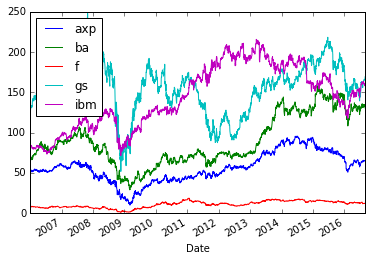

In [68]:
import matplotlib.pyplot as plt

close.plot()
plt.show();

From the graph it appears that there may be a relationship in daily price movements.

Create a matrix for the features determined by the performance.

In [69]:
diff = (close - close.shift(1))
diff = diff[diff < 0].fillna(0)
diff = diff[diff >= 0].fillna(1)
diff.head()

,axp,ba,f,gs,ibm
Date,,,,,
2006-01-03,0.0,0.0,0.0,0.0,0.0
2006-01-04,1.0,0.0,0.0,1.0,1.0
2006-01-05,0.0,1.0,0.0,1.0,0.0
2006-01-06,0.0,1.0,0.0,0.0,0.0
2006-01-09,0.0,1.0,0.0,0.0,1.0


After the data is in a usable form, carry out the rest of the analysis. Here we fit a support vector machine (SVM) model to the data.

SVM is a machine-learning technique used to classify outputs based on features. In this example we created a `diff` matrix that holds the features: stocks such as AXP, BA, IBM and GS, as well as an output variable F. From a mathematical perspective, SVM constructs a hyperplane separating the outputs 0 and 1. If the input point `[[a,b,g,i]]` corresponds to the side of the hyperplane where Ford goes up the SVM predicts 1; otherwise, it predicts 0.

In [70]:
from sklearn import svm

x = diff[['axp', 'ba', 'ibm', 'gs']]
y = np.asarray(diff['f'], dtype="|S6")
obj = svm.SVC()
ft = obj.fit(x,y)
ft

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Given the fit, we can look at predictions. If all the stocks go up:

In [71]:
ft.predict([[1,1,1,1]])

array(['1.0'], 
      dtype='|S6')

And if all go down,

In [72]:
ft.predict([[0,0,0,0]])

array(['0.0'], 
      dtype='|S6')

If BA and IBM go up and the others go down,

In [73]:
ft.predict([[0,1,0,1]])

array(['1.0'], 
      dtype='|S6')

#### Other tools
pandas integrates well with scikit-learn, as they both rely on the fast arrays implemented by NumPy. pandas objects are essentially NumPy arrays with a buffer between the low-level aspects of NumPy and the need for easy data use that pandas provides.

There are many other machine learning tools available including basic regression, neural nets and Gaussian processes. The main takeaway from the above recipe should be that since all of these tools are built on the same NumPy ecosystem, it's not difficult to use them together.

## Integrating pandas with statistics packages (Advanced)
In this example, StatsModels will be used to perform a simple regression analysis. StatsModels, a package for classical statistics in Python, is built with econometrics in mind. This analysis will use the stock closing data from the non-Ford stock and measure its linear relationship with Ford.

First, we import StatsModels and define the `x` (exogenous) and `y` (endogenous) variables. The exogenous variable is really a vector that contains the regressors for the endogenous variable.

In [74]:
import statsmodels.api as sm

x = close[['axp', 'ba', 'gs', 'ibm']]
y = close['f']

ols_model = sm.OLS(y,x)
fit = ols_model.fit()

Now print the results of the fit:

In [75]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      f   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                 1.781e+04
Date:                Wed, 31 Aug 2016   Prob (F-statistic):               0.00
Time:                        18:20:13   Log-Likelihood:                -5990.9
No. Observations:                2684   AIC:                         1.199e+04
Df Residuals:                    2680   BIC:                         1.201e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
axp            0.0422      0.006      7.019      0.000         0.030     0.054
ba             0.0392      0.003     11.902      0.000         0.033     0.046
gs            -0.0054      0.001     -5.364      0.000        -0.007    -0.003
ibm            0.0428      0.001     38.958      0.000         0.041     0.045
==============================================================================
Omnibus:                      293.954   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              443.950
Skew:                           0.803   Prob(JB):                     3.96e-97
Kurtosis:                       4.180   Cond. No.                         37.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Select the different $t$-values from the regression:

In [76]:
fit.tvalues

axp     7.019332
ba     11.901888
gs     -5.363543
ibm    38.958268
dtype: float64

Print the confidence intervals of the betas:

In [77]:
fit.conf_int()

,0,1
axp,0.030400,0.053969
ba,0.032765,0.045691
gs,-0.007381,-0.003429
ibm,0.040628,0.044934


#### Additional datasets
StatsModels is a great place to go and get data sets to practice with.

In [78]:
longly = sm.datasets.longley.load_pandas()
longly.endog.head()

0    60323.0
1    61122.0
2    60171.0
3    61187.0
4    63221.0
Name: TOTEMP, dtype: float64

In [79]:
longly.exog.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


## Using Flask for the backend (Advanced)
In this example we'll spin up an easy backend with Flask, a micro framework that is great for quickly creating a simple web application.

Displaying analysis on the Web is the easiest way to pass the information on to others. Flask can be used as a very simple way of displaying a web page with which pandas can be integrated.

Create a file called `app.py` and populate it with the following text.

``` python
from flask import Flask, render_template
import pandas as pd
import numpy as np

app = Flask(__name__)

@app.route('/report')
def report():
    df = pd.DataFrame(np.random.randn(10,10))
    return render_template('report.html', df=df.to_html())
    
if __name__ == '__main__':
    app.run()
```

Next, create a folder named `templates` in the same directory where `app.py` was created. In that folder, create a file called `report.html` with the following content:

``` html
#templates/report.html
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>My Great Report</title>
    </head>
    <body>
        <h1>My Great Report</h1>
        <!-- This is the only fancy part... we're clearing the html from the to_html() method -->
        {{ df|safe }}
    </body>
</html>
```

Finally, run `python app.py`, then go to `localhost:5000/report` in a browser.

To improve the look of the page, we could use Bootstrap (http://getbootstrap.com/).

## Visualizing pandas objects (Advanced)
Plotting in pandas is done via an interface with matplotlib. pandas offers not only simple diagnostic plots, but also some more advanced visualizations such as `scatter_matrix`.

First, we'll aggregate the `close` DataFrame by mean, then plot it using the `.plot()` method. For the plots we'll use matplotlib's `ggplot` style.

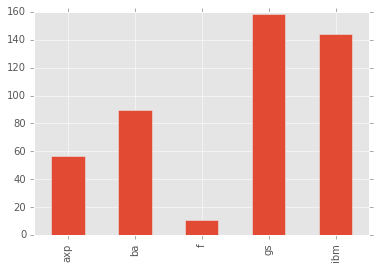

In [80]:
plt.style.use('ggplot')

close.mean().plot(kind='bar')
plt.show();

Create a box plot, which is another plot style directly accessible from the DataFrame object.

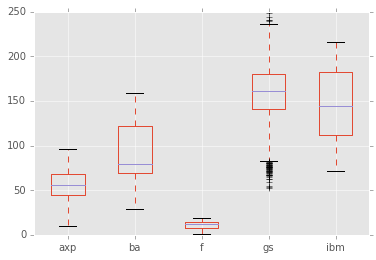

In [81]:
close.boxplot(return_type='axes')
plt.show();

Earlier we were trying to determine the relationship of closing prices between stocks - a **scatter matrix** is a good choice for that. In order to create more complex visualizations than a simple box plot or bar chart, access `pandas.tools.plotting`.

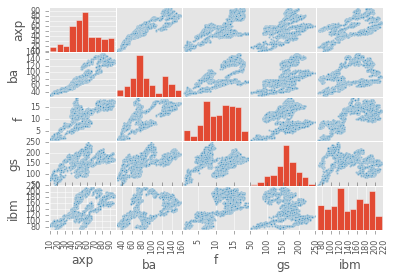

In [82]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(close);
plt.show();

#### Additional options for `scatter_matrix`
Passing the `diagonal` parameter to the `scatter_matrix` function with the 'kde' string will display the kernel density estimation instead of a histogram.

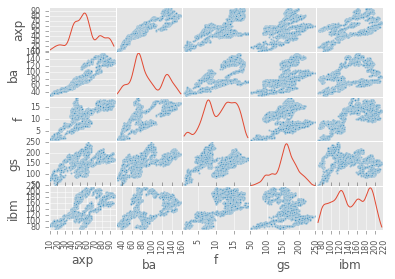

In [83]:
scatter_matrix(close, diagonal='kde');
plt.show();

## Reporting with pandas objects (Medium)
In this final example we'll do something a bit more complex with Flask. Flask can often be used for dead simple APIs, so in this recipe we'll walk through filtering a DataFrame by month via a Flask route. While the data will be fed to a template, this recipe can easily be modified to "jsonify" the DataFrame and do something with an API.

First we'll modify the `app.py` file created above so that in can accept user input to modify `to_html` to work with Bootstrap. Create a file called `app2.py` with the following code:

``` python
from flask import Flask, render_template
import pandas as pd

app = Flask(__name__)
@app.route('/report2/<month>')
def report(month):
    from pandas_datareader.data import DataReader
    ibm = DataReader('ibm', 'yahoo', '2010-01-01', '2010-12-31')
    df = ibm[ibm.index.month == int(month)]
    return render_template('report2.html', df=df.to_html(classes='table'))

if __name__ == '__main__':
    app.run()
```

Next we'll add a custom CSS file and modify the HTML file to work with it. Create a file called `report2.html` in the `templates` folder, with the following:

``` html
<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>IBM Performance by Month</title>

        <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css" integrity="sha384-BVYiiSIFeK1dGmJRAkycuHAHRg32OmUcww7on3RYdg4Va+PmSTsz/K68vbdEjh4u" crossorigin="anonymous">
        <link rel="stylesheet" type="text/css" href={{ url_for('static', filename='css/style.css') }}>
    </head>
    <body>
        <h1>IBM Performance by Month</h1>
        {{ df|safe }}
    </body>
</html>
```

Create a folder named `css`, and in it create a file `style.css` with this content:

``` css
body {
    margin: auto;
    width: 960px;
    padding-top: 50px;
}
```

Now start the Flask server with `python app2.py` and go to `localhost:5000/report2/3` to get the performance for IBM in the month of March.